<a href="https://colab.research.google.com/github/dewdotninja/embedded_iot/blob/master/opamps/hw2_2_hint_answer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3>Signal Conditioning using Op Amp Example</h3>
<p />Suppose we want to design a level shifter circuit shown in Figure 1, 
as a frontend for a DC motor drive. The
input to this circuit has voltage range $\pm 10$ volts, and the output has range 0 - 3.3 volts 
suitable to feed into an ADC input of MCU.
So the mapping is

| Input | Output |
| --- | --- |
| 10 V | 3.3 V |
| 0 V | 1.65 V |
| -10V | 0 V |


<p align="center">
<img src="https://drive.google.com/uc?id=1U2A6_okGC3cUB3zxq253pss62-169tVh" width=600 alt="Figure 1"/>
</p>
<div align="center"><b>Figure 1 Level shifter circuit</b></div>
<p />Our job is to select the values for $R_1 – R_4$, and $V_B$ appropriately. 

<h3>Solution</h3>
<p />The superposition principle is used in the design. Let $V_{in} = 0$ for the moment. We
want to create the 1.65 V DC bias that the AC command signal will ride on. This can be done by
selecting 
$$
R1 = R2 
$$
and 
$$
V_B = -1.65 V
$$
Now, we want to make the AC output part of the op-amp
swing within $\pm 1.65$ V range. Observe that with $V_B = 0, R1 = R2$ yields the non-inverting 
gain of 2. So the signal at non-inverting pin must equal $\pm 0.825$ V. Using the voltage divider 
formula, we have

$$
\frac{R_4}{R_3 + R_4}(10) = 0.825
$$

Hence,

$$
R_3 = 11.12R_4
$$

<p />Verify your design in the cell below.

In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [10]:
Vb = -1.65
R1 = 10000;
R2 = 10000;
R4 = 10000;
R3 = 11.12*R4;

tvec = np.arange(0,1,0.01)
om = 10
Vin = 10*np.sin(om*tvec)
Vout = (R4/(R3+R4))*(1+R2/R1)*Vin - (R2/R1)*Vb

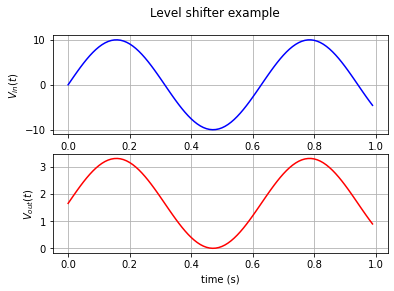

In [18]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Level shifter example')
ax1.plot(tvec,Vin,'b-')
ax1.grid(True)
ax1.set_ylabel('$V_{in}(t)$')
ax2.plot(tvec,Vout,'r-')
ax2.set_xlabel('time (s)')
ax2.set_ylabel('$V_{out}(t)$')
ax2.grid(True)


In [16]:
max(Vout)

3.2994613911575996

In [17]:
min(Vout)

-3.83788186484324e-05